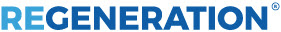









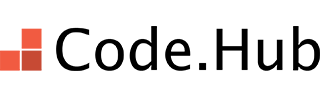

# Group Project March 2021
ReGeneration Academy on Big Data & Artificial Intelligence (powered by Microsoft) | A case study for predicting the price of an Airbnb listing in Athens using Microsoft Azure

## 5 Detailed Objectives
### 5.1 Preprocessing

In [1]:
#some imports

from helper_functions.Clustering_Neighbourhood import clustering_neighbourhoods
from helper_functions.clearAmenity import *
from helper_functions.cleanRows import *
from helper_functions.DataFrames import *
from helper_functions.LabelEncoding import *
from helper_functions.FillNaNValues import *
from sklearn.preprocessing import LabelEncoder


In [2]:
#reading files
file = "csv_creation/primary_data.csv"

# the file should be in the directory "data"
pathToFile = os.path.abspath('') + "/" + file
data_primary = pd.read_csv(file)
file = "csv_creation/secondary_data.csv"
pathToFile = os.path.abspath('') + "/" + file
data_secondary = pd.read_csv(file)
file = "data/listings.csv"
total_data = pd.read_csv(file)



In [3]:
#--------------cleaning bathroom-host_is_superhost column--------------#

### convert bathroom_text to a new column bathroom
temp_column = data_primary["bathrooms_text"].dropna().apply(lambda x: x.split(" ")[0])

data_clean  = data_primary
data_clean['bathrooms_text'] = temp_column
data_clean = data_clean.dropna().rename(columns={'bathrooms_text':'bathrooms'})

d = {'t': 1, 'f': 0}
data_clean = data_clean.replace({"host_is_superhost": d})
data_clean["host_is_superhost"].astype(dtype=int)

# make it as function // input --> column name // output --> clear and mapped column //
print('before cleaning the column we have  ' + str(len(data_primary)))
print("================================================================================")
print("after cleaning we have " + str(len(data_clean["host_is_superhost"])))


before cleaning the column we have  9467
after cleaning we have 5202


In [4]:
#--------------cleaning amenities column--------------#

# convert amenities to a dictionary and user one hot encoder
print("================== Clearing amenities ======================")
df = data_primary
df["amenities"] = df["amenities"].apply(clean_rows)

word_dict = {}
for lista in df["amenities"]:
    for item in lista:
        item_temp = item.replace(' \"','\"')
        if item_temp not in word_dict:
            word_dict[item_temp] = 1
        else:
            word_dict[item_temp] += 1

most_freq_word = col.Counter(word_dict)
most_freq_dict = {}
for word, count in most_freq_word.most_common(80):
    most_freq_dict[word] = count
    print(word, ": ", count)

dict_keys = str(most_freq_dict.keys())

================== Clearing amenities ======================
"wifi" :  9031
"essentials" :  8987
"air conditioning" :  8862
"hair dryer" :  8593
"long term stays allowed" :  8570
"hangers" :  8521
"kitchen" :  8508
"tv" :  8169
"shampoo" :  8077
"iron" :  8038
"heating" :  7830
"hot water" :  7027
"dedicated workspace" :  6708
"refrigerator" :  6442
"dishes and silverware" :  6369
"cooking basics" :  6167
"washer" :  6090
"coffee maker" :  5927
"elevator" :  5383
"bed linens" :  5348
"stove" :  5062
"fire extinguisher" :  4993
"first aid kit" :  4872
"oven" :  4698
"patio or balcony" :  4504
"free street parking" :  4446
"extra pillows and blankets" :  3517
"microwave" :  3317
"smoke alarm" :  3206
"private entrance" :  2670
"luggage dropoff allowed" :  2503
"host greets you" :  2462
"carbon monoxide alarm" :  2270
"paid parking off premises" :  2125
"shower gel" :  1934
"lockbox" :  1762
"dryer" :  1532
"crib" :  1458
"room-darkening shades" :  1330
"dishwasher" :  1234
"high chair" :

In [5]:

data = data_primary
print("=================== creating wifi category =====================\n")
new_category = "wifi"

sub_categories = ["wifi","ethernet connection"]
size = len(data_primary)

wifi_category = join_main_category(new_category, sub_categories,word_dict,size,data)

print("=================== elements of the wifi_category ==============\n")
print(col.Counter(wifi_category))


=================== creating wifi category =====================

=================== elements of the wifi_category ==============

Counter({1.0: 9164, 0.0: 303})


In [6]:
print("=================== creating kid_friendly_category =====================\n")
new_category = "crib"

sub_categories = ["crib","child","toys"]
size = len(data_primary)

kid_friendly_category = join_main_category(new_category, sub_categories,word_dict,size,data)

print("=================== elements of the kid_friendly_category ==============\n")
print(col.Counter(kid_friendly_category))

=================== creating kid_friendly_category =====================

=================== elements of the kid_friendly_category ==============

Counter({0.0: 7145, 1.0: 2322})


In [7]:
print("=================== creating washing_category =====================\n")
new_category = "washer"

sub_categories = ["washer"]
size = len(data_primary)

washing_category = join_main_category(new_category, sub_categories,word_dict,size,data)

print("=================== elements of the washing_category ==============\n")
print(col.Counter(washing_category))

=================== creating washing_category =====================

=================== elements of the washing_category ==============

Counter({1.0: 6373, 0.0: 3094})


In [8]:
print("=================== creating bathroom_essentials_category =====================\n")
new_category = "bathroom essentials"

sub_categories = ["bathroom essentials",
                    "hair dryer",
                    "shampoo",
                    "hot water",
                    "outlet covers",
                    "shower gel",
                    "dryer",
                    "bathtub",
                    "body soap"]
size = len(data_primary)

bathroom_essentials_category = join_main_category(new_category, sub_categories,word_dict,size,data)

print("=================== elements of the bathroom_essentials_category ==============\n")
print(col.Counter(bathroom_essentials_category))

=================== creating bathroom_essentials_category =====================

=================== elements of the bathroom_essentials_category ==============

Counter({1.0: 9252, 0.0: 215})


In [9]:
print("=================== creating heating_category =====================\n")
new_category = "heating"

sub_categories = ["heating",
                "indoor fireplace",
                "central heating"]

size = len(data_primary)

heating_category = join_main_category(new_category, sub_categories,word_dict,size,data)

print("=================== elements of the heating_category ==============\n")
print(col.Counter(heating_category))

=================== creating heating_category =====================

=================== elements of the heating_category ==============

Counter({1.0: 7950, 0.0: 1517})


In [10]:
print("=================== creating fire_safety_category =====================\n")
new_category = "fire_safety"

sub_categories = ["fire extinguisher",
                "carbon monoxide alarm",
                "smoke alarm"]

size = len(data_primary)

fire_safety_category = join_main_category(new_category, sub_categories,word_dict,size,data)

print("=================== elements of the fire_safety_category ==============\n")
print(col.Counter(fire_safety_category))

=================== creating fire_safety_category =====================

=================== elements of the fire_safety_category ==============

Counter({1.0: 5627, 0.0: 3840})


In [11]:
print("=================== creating kitchen_category =====================\n")
new_category = "kitchen"

sub_categories = ["kitchen"]

size = len(data_primary)

kitchen_category = join_main_category(new_category, sub_categories,word_dict,size,data)

print("=================== elements of the kitchen_category_category ==============\n")
print(col.Counter(kitchen_category))

=================== creating kitchen_category =====================

=================== elements of the kitchen_category_category ==============

Counter({1.0: 8670, 0.0: 797})


In [12]:
print("=================== creating cook_extra_category =====================\n")
new_category = "cook_extra"

sub_categories = ["oven"
                "microwave",
                "kitchen",
                "cooking basics",
                "stove",
                "barbecue utensils",
                "electric stove",
                "bbq grill"]

size = len(data_primary)

cook_extra_category = join_main_category(new_category, sub_categories,word_dict,size,data)

print("=================== elements of the cook_extra_category ==============\n")
print(col.Counter(cook_extra_category))

=================== creating cook_extra_category =====================

=================== elements of the cook_extra_category ==============

Counter({1.0: 8763, 0.0: 704})


In [13]:
print("=================== creating free_parking_category =====================\n")
new_category = "free_parking"

sub_categories = ["free parking on premises",
                  "free street parking"]

size = len(data_primary)

free_parking_category = join_main_category(new_category, sub_categories,word_dict,size,data)

print("=================== elements of the free_parking_category ==============\n")
print(col.Counter(free_parking_category))

=================== creating free_parking_category =====================

=================== elements of the free_parking_category ==============

Counter({1.0: 4783, 0.0: 4684})


In [14]:
def clean_t_f(series,drop):
    s = series.value_counts(normalize=True,dropna = drop)
    series_fill_na = series.fillna(pd.Series(np.random.choice(s.index, p=s.values, size=len(series.isnull()))))
    series_encoded = series_fill_na.replace({'f': 0, 't': 1})
    return series_encoded

In [15]:
#--------------cleaning amenities column--------------#

clear_data = pd.DataFrame()
drop = True
col  = 'instant_bookable'
clear_data[col] = clean_t_f(data_primary[col],drop)

col = 'host_has_profile_pic'
clear_data[col] =  clean_t_f(data_primary[col],drop)

col = 'host_is_superhost'
clear_data[col] =  clean_t_f(data_primary[col],drop) 

col = 'host_identity_verified'
clear_data[col] =  clean_t_f(data_primary[col],drop)

# --------------------------------------------
col = "kitchen_category"
clear_data[col] =  kitchen_category

col = "fire_safety"
clear_data[col] =  fire_safety_category

col = 'wifi_category'
clear_data[col] =  wifi_category

col = 'free_parking_category'
clear_data[col] =  free_parking_category 

col = "cook_extra_category"
clear_data[col] =  cook_extra_category

col = "heating_category"
clear_data[col] =  heating_category

col = "bathroom_essentials_category"
clear_data[col] =  bathroom_essentials_category

col = "washing_category"
clear_data[col] =  washing_category

col = "kid_friendly_category"
clear_data[col] =  kid_friendly_category

# ------------------------------------
col = "price"
clear_data[col] =  kid_friendly_category

clear_data.head(10)


,instant_bookable,host_has_profile_pic,host_is_superhost,host_identity_verified,kitchen_category,fire_safety,wifi_category,free_parking_category,cook_extra_category,heating_category,bathroom_essentials_category,washing_category,kid_friendly_category,price
0,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0,1,1,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
6,0,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,1,0,0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
8,0,1,1,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
9,0,1,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [16]:
#--------------cleaning price column--------------#
clear_data["price"] = data_primary['price'].str.replace(',', '').str.replace('$', '').astype(float)


In [17]:
#--------------cleaning review scores columns--------------#

clear_data["review_scores_accuracy"] = data_primary["review_scores_accuracy"]
clear_data["review_scores_rating"]   = data_primary["review_scores_rating"]

cols = ["review_scores_accuracy","review_scores_rating"]
for i in cols:
    clear_data= FillNaNWithCurrentDistribution(i,clear_data)

In [18]:
#--------------filling baths column--------------#

clear_data["baths"] = data_primary["bathrooms_text"]
clear_data["accommodates"] = data_primary["accommodates"]
clear_data["beds"]         = data_primary["beds"]
clear_data["bedrooms"]     = data_primary["bedrooms"]

def fill_beds(df_row):
    """ input: dataframe
    fills nan values of beds with the values of "beds" from cells with the same value of "accommodates"
    output: dataframe with the column "beds" without nan"""
    df = clear_data
    if str(df_row["beds"]) == "nan" : 
        for i in range(0, int(df['accommodates'].max() + 1)) :
            if df_row["accommodates"] == i:
                data_temp = df[df["accommodates"] == i]
                df_row["beds"] = round(data_temp["beds"].mean())
    
    return df_row

def fill_bedrooms(df_row):
    """ input: dataframe
    fills nan values of bedrooms with the values of "bedrooms" from cells with the same value of "beds"
    output: dataframe with the column "bedrooms" without nan"""
    df = clear_data
    if str(df_row["bedrooms"]) == "nan" : 
        for i in range(0, int(df['beds'].max()+1)) :
            if df_row["beds"] == i:
                data_temp = df[df["beds"] == i]
                df_row["bedrooms"] = round(data_temp["bedrooms"].mean())
    
    return df_row
clear_data = clear_data.apply(fill_beds,axis = 1)
clear_data = clear_data.apply(fill_bedrooms,axis = 1)
print(clear_data["bedrooms"].isnull().sum())
clear_data.head(5)

0


,instant_bookable,host_has_profile_pic,host_is_superhost,host_identity_verified,kitchen_category,fire_safety,wifi_category,free_parking_category,cook_extra_category,heating_category,bathroom_essentials_category,washing_category,kid_friendly_category,price,review_scores_accuracy,review_scores_rating,baths,accommodates,beds,bedrooms
0,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,84.0,10.0,97.0,2,8,5.0,3.0
1,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,10.0,98.0,1,4,1.0,1.0
2,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,40.0,10.0,97.0,1,2,1.0,1.0
3,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,10.0,96.0,1,4,2.0,1.0
4,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,10.0,95.0,1,4,1.0,1.0


In [19]:
#--------------clearing baths column--------------#
clear_data["baths"] = clear_data["baths"].replace({'Half-bath': 0.5})
clear_data["baths"] = clear_data["baths"].replace({'Shared': 0.5})
clear_data= FillNaNWithCurrentDistribution("baths",clear_data)
clear_data["baths"].unique()

array(['2', '1', '1.5', '5.5', '3', '4', '3.5', '2.5', '0', 0.5, '4.5',
       '5', '8', '9.5', '6.5', '12', '49.5'], dtype=object)

In [20]:
#--------------clearing room_type - host_response_time columns--------------#
data_primary = dfimport.GetPrimaryDataFrame()
col1  = "host_response_time"

s = data_primary[col1].value_counts(normalize=True)
missing = data_primary[col1].isnull()
print(" BEFORE -->  sum of all missing values :  " + str(data_primary[col1].isnull().sum()))
data_primary.loc[missing, col1] = np.random.choice(s.index, size=len(data_primary[missing]), p=s.values)

s = data_primary[col1].value_counts(normalize=True)
print(" AFTER  -->  sum of all missing values :  " + str(data_primary[col1].isnull().sum()))
labelencoder = LabelEncoder()
data_primary[col1] = labelencoder.fit_transform(data_primary[col1])

clear_data["host_response_time"] = data_primary["host_response_time"]


col1  = "room_type"
s = data_primary[col1].value_counts(normalize=True)
missing = data_primary[col1].isnull()
print(" BEFORE -->  sum of all missing values :  " + str(data_primary[col1].isnull().sum()))
data_primary.loc[missing, col1] = np.random.choice(s.index, size=len(data_primary[missing]), p=s.values)

s = data_primary[col1].value_counts(normalize=True)
print(" AFTER  -->  sum of all missing values :  " + str(data_primary[col1].isnull().sum()))
labelencoder = LabelEncoder()
data_primary[col1] = labelencoder.fit_transform(data_primary[col1])



clear_data["room_type"] = data_primary["room_type"]


 BEFORE -->  sum of all missing values :  2580
 AFTER  -->  sum of all missing values :  0
 BEFORE -->  sum of all missing values :  0
 AFTER  -->  sum of all missing values :  0


In [21]:
#--------------adding some extra columns--------------#
cols = ['minimum_nights','maximum_nights','number_of_reviews']
clear_data[cols]=total_data[cols]
clear_data

,instant_bookable,host_has_profile_pic,host_is_superhost,host_identity_verified,kitchen_category,fire_safety,wifi_category,free_parking_category,cook_extra_category,heating_category,...,review_scores_rating,baths,accommodates,beds,bedrooms,host_response_time,room_type,minimum_nights,maximum_nights,number_of_reviews
0,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,...,97.0,2,8,5.0,3.0,3,0,1,45,25
1,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,...,98.0,1,4,1.0,1.0,3,0,1,60,44
2,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,...,97.0,1,2,1.0,1.0,3,0,1,60,58
3,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,...,96.0,1,4,2.0,1.0,3,0,1,60,23
4,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,...,95.0,1,4,1.0,1.0,3,0,1,30,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9462,1,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,...,100.0,1.5,2,1.0,1.0,3,0,2,1125,0
9463,1,1,0,1,1.0,0.0,1.0,0.0,1.0,1.0,...,93.0,1,4,2.0,2.0,3,0,2,1125,0
9464,1,1,0,1,1.0,0.0,1.0,0.0,1.0,1.0,...,98.0,1,4,2.0,2.0,3,0,2,1125,0
9465,1,1,0,0,1.0,1.0,1.0,0.0,1.0,1.0,...,87.0,1,4,3.0,2.0,2,0,2,1125,0


In [22]:
#--------------clustering neighbourhoods by latitude & longitude--------------#
clusters=5
clear_data=clustering_neighbourhoods(clusters,clear_data)
clear_data

,instant_bookable,host_has_profile_pic,host_is_superhost,host_identity_verified,kitchen_category,fire_safety,wifi_category,free_parking_category,cook_extra_category,heating_category,...,host_response_time,room_type,minimum_nights,maximum_nights,number_of_reviews,NLabels_0,NLabels_1,NLabels_2,NLabels_3,NLabels_4
0,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,...,3,0,1,45,25,1,0,0,0,0
1,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,...,3,0,1,60,44,1,0,0,0,0
2,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,...,3,0,1,60,58,1,0,0,0,0
3,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,...,3,0,1,60,23,1,0,0,0,0
4,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,...,3,0,1,30,17,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9462,1,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,...,3,0,2,1125,0,0,0,1,0,0
9463,1,1,0,1,1.0,0.0,1.0,0.0,1.0,1.0,...,3,0,2,1125,0,1,0,0,0,0
9464,1,1,0,1,1.0,0.0,1.0,0.0,1.0,1.0,...,3,0,2,1125,0,0,0,0,1,0
9465,1,1,0,0,1.0,1.0,1.0,0.0,1.0,1.0,...,2,0,2,1125,0,0,0,0,0,1


In [23]:
#--------------saving final csv--------------#
#clear_data.to_csv('csv_creation/final_clean.csv')